In [1]:
import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Random Sampling

In [2]:
united = Table.read_table('united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


In [7]:
united.take(9)

Row,Date,Flight Number,Destination,Delay
9,6/1/15,317,IND,-10


In [4]:
type(united.take(9))

datascience.tables.Table

In [6]:
type(united.row(9))

datascience.tables.Row

### Deterministic Sample

In [8]:
united.where('Destination', 'JFK') 

Row,Date,Flight Number,Destination,Delay
26,6/1/15,502,JFK,-4
33,6/1/15,637,JFK,141
39,6/1/15,704,JFK,-8
50,6/1/15,758,JFK,-5
51,6/1/15,760,JFK,352
56,6/1/15,824,JFK,3
57,6/1/15,898,JFK,290
179,6/2/15,502,JFK,0
188,6/2/15,637,JFK,202
194,6/2/15,704,JFK,-11


Question: Why is this a deterministic sample?

### A Systematic Sample

In [9]:
np.arange(0, united.num_rows, 1000)

array([    0,  1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,
        9000, 10000, 11000, 12000, 13000])

In [10]:
united.take(np.arange(0, united.num_rows, 1000))

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1000,6/7/15,1692,EWR,7
2000,6/14/15,824,JFK,-1
3000,6/21/15,217,EWR,5
4000,6/27/15,1401,SAN,-4
5000,7/4/15,1614,LAS,-2
6000,7/11/15,401,CLE,4
7000,7/17/15,1645,IAD,0
8000,7/24/15,624,ORD,61
9000,7/30/15,1728,ORD,209


In [11]:
np.random.choice(1000)

813

In [13]:
united.take(np.arange(np.random.choice(1000), united.num_rows, 1000))

Row,Date,Flight Number,Destination,Delay
906,6/7/15,381,DEN,-1
1906,6/13/15,1608,EWR,-4
2906,6/20/15,568,EWR,-3
3906,6/26/15,1751,LAS,46
4906,7/3/15,1727,IND,25
5906,7/10/15,1273,OGG,0
6906,7/17/15,444,BOS,0
7906,7/23/15,1614,LAS,0
8906,7/30/15,591,IAH,-8
9906,8/5/15,1602,ATL,5


### A Random Sample

In [23]:
np.random.choice(united.num_rows, 5)

array([4930, 5176, 4955, 2433, 9899])

In [22]:
united.num_rows

13825

In [26]:
rand_sample = united.take(np.random.choice(united.num_rows, 5)) 
rand_sample.show()

Row,Date,Flight Number,Destination,Delay
1161,6/8/15,1727,IND,-5
5656,7/9/15,237,STL,2
11455,8/15/15,1283,SAN,6
4309,6/29/15,1602,ATL,4
4841,7/3/15,499,PDX,1


### What's the probability of getting this sample?

What's the probability of getting three specific rows?

In [27]:
united.num_rows
(1 / united.num_rows) * (1 / united.num_rows ) * (1/ united.num_rows)

3.7844657579379896e-13

Now let's extrapulate that to our sample of 5 rows

In [29]:
sample_size = 1 
total_probability = 5
for i in np.arange(sample_size):
    total_probability = total_probability * (1 / (united.num_rows))
total_probability

0.0003616636528028933

In [30]:
def sample_probability(sample_size):
    total_probability = 1
    for i in np.arange(sample_size):
        total_probability = total_probability * (1 / (united.num_rows - i))
    return total_probability

sample_probability(1) > sample_probability(10)

True

(back to slides)

### Sample of convenience

In [ ]:
start = np.random.choice(np.arange(1000))
systematic_sample = ... 
systematic_sample.show()

<details>,
<summary>Solution</summary>
  united.take(np.arange(start, united.num_rows, 1000))
</details>


(back to slides)

# Distributions

In [31]:
die = Table().with_column('Face', np.arange(1, 7))
die

Face
1
2
3
4
5
6


### How can we take 10 samples of rolling a die

<details>,
<summary>Solution</summary>
  die.sample(10)
</details>

In [35]:
 # Hint: look at python reference for sampling form a table
die.sample(10)

Face
6
2
6
3
3
1
3
5
4
5


### Whats the initial probability of each side?


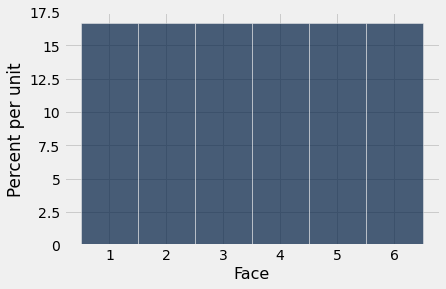

In [36]:
die.hist(bins=np.arange(0.5, 7.5, 1))

How did our sample fall out?

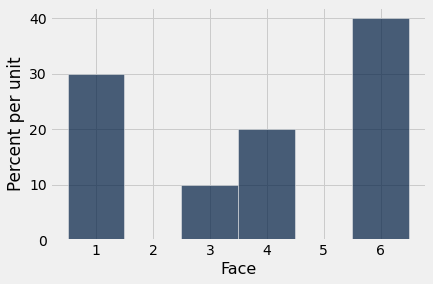

In [38]:
die.sample(10).hist(bins=np.arange(0.5, 7.5, 1))

(back to slides)

# Law of large numbers

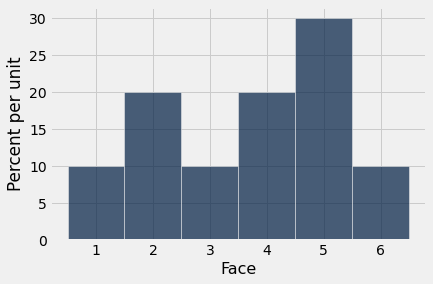

In [44]:
die.sample(10).hist(bins=np.arange(0.5, 7.5, 1))

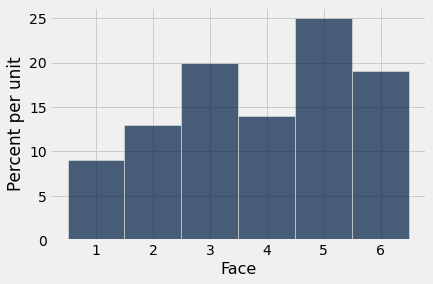

In [49]:
die.sample(100).hist(bins=np.arange(0.5, 7.5, 1))

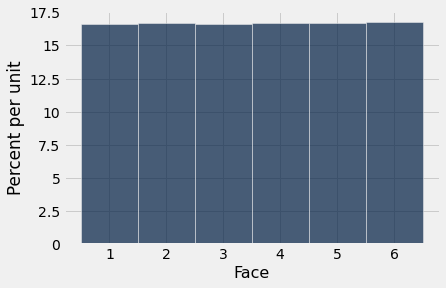

In [52]:
die.sample(int(1e6)).hist(bins=np.arange(0.5, 7.5, 1))

In [ ]:
die = np.arange(1,7)
die

### Let's roll a dice 10, 50, and 10,000 times and see the distribution of rolls

In [53]:
for i in make_array(10, 50, 10000):
    Table().with_columns('roll', np.random.choice(die,i)).hist('roll', bins=np.arange(0.5,7.5, 1))

/opt/conda/lib/python3.8/site-packages/datascience/tables.py:222: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


ValueError: invalid __array_struct__

### Repeat the above multiple times and see the differences

(back to slides)
# Simulating Statistics 

### Average time of all delays

In [54]:
np.median(united.column('Delay'))

2.0

### Average time of 10 random delays

In [55]:
np.median(united.sample(10).column('Delay'))

11.5

In [56]:
np.median(united.sample(10).column('Delay'))

0.0

#### Write a function that given a specified sample size called `size`, returns the median of those `size` samples

What type is `size` here?

In [57]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay')) 

In [61]:
sample_median(4)

3.0

<details>,
<summary>Solution</summary>
  np.median(united.sample(size).column('Delay'))
</details>


In [65]:
sample_median(1000)

3.0

Change function to work on anty table with a delay column

In [66]:
def sample_median(size, tbl):
    return np.median(tbl.sample(size).column('Delay')) 

In [69]:
sample_median(100, united)

2.5

the above assumes we have a column named delay

In [70]:
def sample_median(size, tbl, column_name):
    return np.median(tbl.sample(size).column(column_name)) 

In [71]:
sample_median(1000, united, "Delay")

2.0

In [74]:
sample_median(20, united, "Flight Number")

1332.5